## 1: Load Data

In [1]:
import json

def load_data(file_path):
    """
    Load the JSON file and return the data.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        return data.get("hits", [])  # Extract 'hits' directly if it's a list
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return []
    except json.JSONDecodeError:
        print(f"Error: Unable to decode JSON from file at {file_path}")
        return []

# File path to the JSON file
file_path = r"Language_Country_Search.json"

# Load data
data = load_data(file_path)

# Check if the data is loaded successfully
if data:
    print(f"Loaded {len(data)} records from the file.")
else:
    print("No data available.")


Loaded 10 records from the file.


## 2: Normalize Data

In [2]:
import pandas as pd

def normalize_data(hits):
    """
    Flatten and clean the data into a Pandas DataFrame.
    """
    if not hits:
        print("No data available to normalize.")
        return pd.DataFrame()

    # Normalize the nested JSON data
    df = pd.json_normalize(
        hits,
        record_path=["workplace_addresses"],  # Adjust the path to the correct key
        meta=["headline", "brief", "occupation_group.label", "occupation_field.label", "employer.name", "publication_date"],
        sep="_",
        errors="ignore"
    )

    # Clean and preprocess data
    df["region"] = df["region"].fillna("Unknown")
    df["occupation_field.label"] = df["occupation_field.label"].fillna("Unknown")
    df["publication_date"] = pd.to_datetime(df["publication_date"], errors='coerce')

    return df

# Normalize the data
df = normalize_data(data)

# Check if normalization was successful
if not df.empty:
    print("Data normalized successfully.")
    print(df.head())  # Display the first few rows
else:
    print("No data to normalize.")


Data normalized successfully.
  municipality_concept_id municipality region_concept_id          region  \
0                                                                          
1            UTJZ_zHH_mJm   Sundbyberg      CifL_Rzy_Mku  Stockholms län   
2                                                                          
3                                                                          
4                                                                          

  country_concept_id  country  \
0       37nR_YtF_158  Litauen   
1       i46j_HmG_v64  Sverige   
2       u8qF_qpq_R5W    Malta   
3       WgbG_whJ_E7J  Finland   
4       i46j_HmG_v64  Sverige   

                                            headline  \
0                  Fondadministratörer till Swedbank   
1                  Fondadministratörer till Swedbank   
2  Byt regn mot sol – Bli online croupier på magi...   
3                                         Controller   
4                                 

## 3: Analyze Data

In [3]:
def analyze_by_region(df):
    """Analyze the number of job postings by region."""
    return df["region"].value_counts()

def analyze_by_occupation_field(df):
    """Analyze the number of job postings by occupation field."""
    return df["occupation_field.label"].value_counts()

def analyze_top_employers(df, top_n=10):
    """Identify the top employers based on job postings."""
    return df["employer.name"].value_counts().head(top_n)

# Analyze data
if not df.empty:
    jobs_by_region = analyze_by_region(df)
    print("\nJobs by Region:")
    print(jobs_by_region)

    jobs_by_field = analyze_by_occupation_field(df)
    print("\nJobs by Occupation Field:")
    print(jobs_by_field)

    top_employers = analyze_top_employers(df)
    print("\nTop Employers:")
    print(top_employers)
else:
    print("No data to analyze.")



Jobs by Region:
region
                  11
Stockholms län     2
Skåne län          2
Name: count, dtype: int64

Jobs by Occupation Field:
occupation_field.label
Unknown    15
Name: count, dtype: int64

Top Employers:
Series([], Name: count, dtype: int64)


## 4. Visualize Data

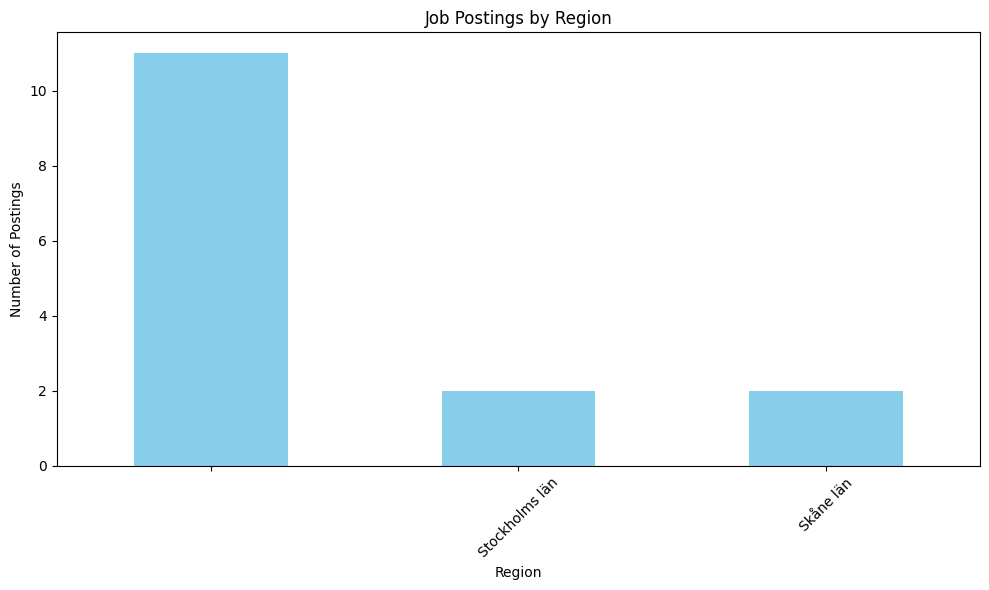

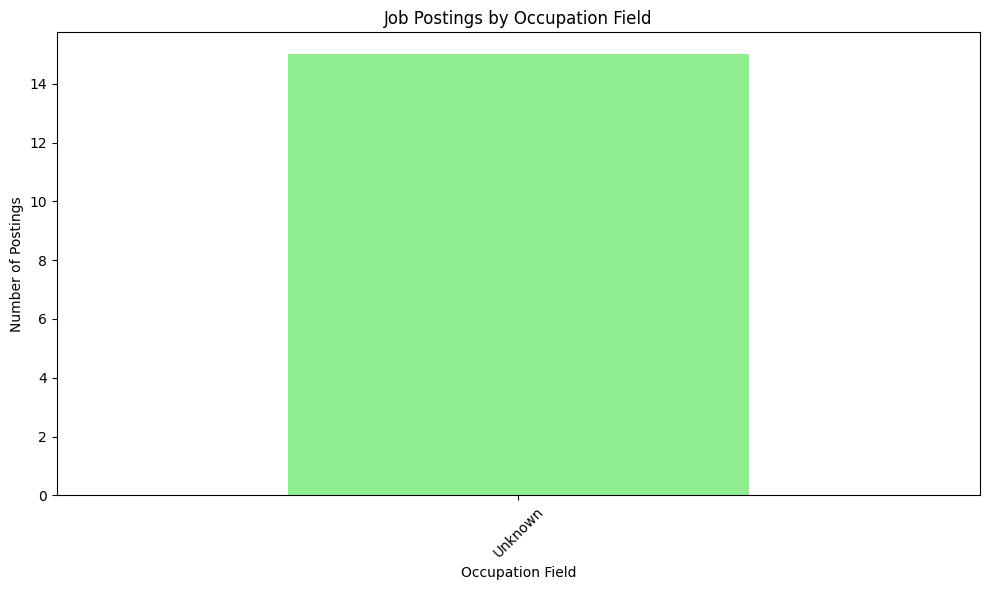

In [4]:
import matplotlib.pyplot as plt

def visualize_data(data, title, xlabel, ylabel, color="skyblue"):
    """Create a bar plot for the given analysis data."""
    if data.empty:
        print(f"No data available to visualize for: {title}")
        return

    plt.figure(figsize=(10, 6))
    data.plot(kind="bar", color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize data
if not df.empty:
    visualize_data(jobs_by_region, "Job Postings by Region", "Region", "Number of Postings")
    visualize_data(jobs_by_field, "Job Postings by Occupation Field", "Occupation Field", "Number of Postings", color="lightgreen")
else:
    print("No data to visualize.")


## 5. Save the Cleaned Data

In [5]:
def save_cleaned_data(df, output_path, file_format="csv"):
    """
    Save the cleaned DataFrame to a specified file format.
    
    Parameters:
    df (pd.DataFrame): The cleaned DataFrame to save.
    output_path (str): The file path to save the data.
    file_format (str): The format to save the file ('csv' or 'excel').
    
    Returns:
    None
    """
    try:
        if df.empty:
            print("No data to save.")
            return
        
        if file_format == "csv":
            df.to_csv(output_path, index=False, encoding="utf-8")
            print(f"Data successfully saved as CSV to {output_path}")
        elif file_format == "excel":
            df.to_excel(output_path, index=False, encoding="utf-8")
            print(f"Data successfully saved as Excel to {output_path}")
        else:
            print("Unsupported file format. Use 'csv' or 'excel'.")
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")

# Save cleaned data
output_csv_path = r"cleaned_Language_Country_Search.csv"
save_cleaned_data(df, output_csv_path, file_format="csv")


Data successfully saved as CSV to cleaned_Language_Country_Search.csv
